In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
taxi_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
taxi_bus_st = taxi_tickets[taxi_tickets['Violation Code'] == '0964170B']
taxi_bus_st['Issue Date'] = pd.to_datetime(taxi_bus_st['Issue Date'])
taxi_bus_st = taxi_bus_st.set_index(pd.DatetimeIndex(taxi_bus_st['Issue Date']))
print(taxi_bus_st.dtypes)
print(taxi_bus_st.shape)
taxi_bus_st.head()

Ticket Number                     int64
License Plate Number             object
License Plate State              object
License Plate Type               object
Ticket Make                      object
Issue Date               datetime64[ns]
Violation Location               object
Violation Code                   object
Violation Description            object
Badge                            object
Unit                             object
Ticket Queue                     object
Hearing Dispo                    object
Latitude                        float64
Longitude                       float64
Ward                              int64
dtype: object
(12644, 16)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
2009-01-06 06:53:00,54574383,5141TX,IL,TXI,MERC,2009-01-06 06:53:00,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2009-01-09 06:35:00,55571353,5493TX,IL,TXI,CHEV,2009-01-09 06:35:00,5433 N WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Paid,Liable,41.980131,-87.689240,40
2009-02-04 06:30:00,55773331,5526TX,IL,TXI,FORD,2009-02-04 06:30:00,6025 WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",17392,24,Notice,Did Not Challenge,41.809069,-87.911448,0
2009-02-05 06:30:00,55773397,5526TX,IL,TXI,FORD,2009-02-05 06:30:00,6025 WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",17392,24,Notice,Did Not Challenge,41.809069,-87.911448,0
2009-02-17 06:30:00,56067085,2426TX,IL,TXI,FORD,2009-02-17 06:30:00,5412 N DAMEN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Dismissed,Not Liable,41.980032,-87.679598,40


### Business Street Ticket Times

According to Chicago city code, "taxicabs are prohibited from parking on business streets between the hours of 2:00AM and 7:00AM for more than 2 hours", with the exception of certain streets and wards. Looking at how many tickets were issued outside of that time frame, with the understanding that it could have been just before or just after.

#### Notes

* Only 280 tickets were issued outside of prohibited times, but it seems like they were issued throughout the day
* Interesting, because most drivers still did not challenge these tickets, but those that did seemed to have an extremely high success rate compared to most other challenged tickets

In [7]:
taxi_bus_times = taxi_bus_st.loc[(taxi_bus_st.index.hour < 2) | (taxi_bus_st.index.hour > 7)]
print('{} tickets were issued outside of the prohibited time'.format(taxi_bus_times['Ticket Number'].count()))
taxi_bus_times.index.hour[:20]

280 tickets were issued outside of the prohibited time


array([19, 14, 17, 19, 12, 18, 12,  8,  9, 18, 17, 18,  8, 17, 10, 10, 15,
       14, 17, 14], dtype=int32)

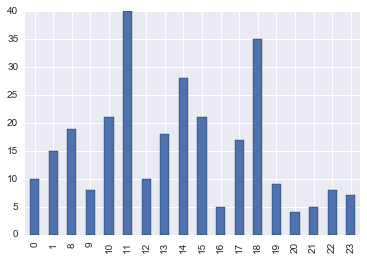

In [10]:
taxi_tix_times = taxi_bus_times.groupby(taxi_bus_times.index.hour)['Ticket Number'].count()
taxi_tix_times.plot(kind='bar')

Hearing status by number of taxi tickets issued


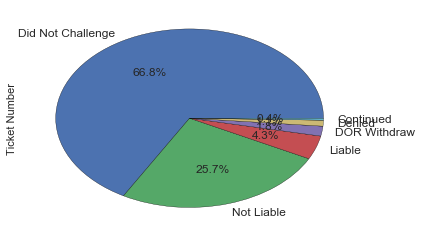

In [11]:
# Challenges for these tickets
hearing_group = taxi_bus_times.groupby(['Hearing Dispo'])['Ticket Number'].count()
hearing_group = hearing_group.sort_values(ascending=False)
print('Hearing status by number of taxi tickets issued')
hearing_group.plot(kind='pie',autopct='%1.1f%%', fontsize=12)